In [1]:
#Math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#Visual
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

Welcome {^_^}

>> Embeddding are mathematical representation that capture semantic meaning of words, text. which help the machine to perform Similarity search, Retrieval process (RAG), Text generation..etc

### Topics
1. Bag of Words (BoW)
2. Keyword Extraction (TF-IDF)
2. One-Hot Encoding
3. Principal Component Analysis (PCA)
4. 3D Plot
5. Word Embeddings (Word2Vec)

<center><h3>Bag of Words</h3></center>

In [2]:
def box(doc):
    vector = CountVectorizer()
    
    box_matric = vector.fit_transform(document)
    feature_names = vector.get_feature_names_out()
    box_array = box_matric.toarray()
    
    return feature_names, box_array
    
    
document = [
        "Hi, I am Kabil",
        "Let's learn about the mystery behind Embeddings",
        "Embeddings help the machine to learn the meaning of words"
    ]
Words, Embed = box(document)
print("Bag of words:", Words)
print(" ")
print("One-hot Encoding:", Embed)
print(" ")
print(type(Embed))

Bag of words: ['about' 'am' 'behind' 'embeddings' 'help' 'hi' 'kabil' 'learn' 'let'
 'machine' 'meaning' 'mystery' 'of' 'the' 'to' 'words']
 
One-hot Encoding: [[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0]
 [0 0 0 1 1 0 0 1 0 1 1 0 1 2 1 1]]
 
<class 'numpy.ndarray'>


<center><h2>KeyWords Extraction using TF-IDF</h2></center>

####  Term Frequency:

$$
TF(t,d) = \frac{t_id_i}{t_nd_i}
$$

$t_id_i$ = No. of times of term$(t_i)$ appears in document$(d_i)$\
$t_nd_n$ = Total no. terms$(t_n)$ in document$(d_i)$

#### Inverse Document Frequency:

$$
IDF(t) = \log(\frac{d_n}{t_id_n})
$$

$d_n$ = Total no. of documents$(d_n)$ \
$t_id_n$ = No. of occurance of term$(t_i)$ in documents$(d_n)$

#### TF-IDF Formula:
$$
TF-IDF = TF(t,d)*IDF(t)
$$

In [3]:
def keyword(data):
    key = TfidfVectorizer()
    
    freq_matrix  = key.fit_transform(data)
    
    words = key.get_feature_names_out()
    return freq_matrix, words

data = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "the cat chased the dog"
]
keywords, word = keyword(data)

print("Bag of words:",word)
print(" ")
print("These Bag of words(word) are compared with document(1, 2, 3) to create a vector matrix of shape (3, 8) 3columns = 3documents and 8rows = no of words in the Bag of words.")
print(" ")
np.set_printoptions(precision=4, suppress=True)#pretty print 
print(keywords.toarray())
print(" ")
print("Shape of the vector matric:",keywords.shape)

Bag of words: ['cat' 'chased' 'dog' 'log' 'mat' 'on' 'sat' 'the']
 
These Bag of words(word) are compared with document(1, 2, 3) to create a vector matrix of shape (3, 8) 3columns = 3documents and 8rows = no of words in the Bag of words.
 
[[0.3742 0.     0.     0.     0.492  0.3742 0.3742 0.5812]
 [0.     0.     0.3742 0.492  0.     0.3742 0.3742 0.5812]
 [0.4035 0.5306 0.4035 0.     0.     0.     0.     0.6267]]
 
Shape of the vector matric: (3, 8)


<center><h2>Principle Component Analysis</h2></center>

In [4]:
pca = PCA(n_components = 3)
Dimension = pca.fit_transform(keywords.toarray().T)#T-> Transverse

print(Dimension)

[[ 0.1864 -0.0741  0.2646]
 [ 0.3829 -0.2921  0.    ]
 [ 0.1864 -0.0741 -0.2646]
 [-0.2243 -0.1078 -0.3479]
 [-0.2243 -0.1078  0.3479]
 [-0.2753  0.0661 -0.    ]
 [-0.2753  0.0661 -0.    ]
 [ 0.2435  0.5236 -0.    ]]


In [5]:
Embedding = {}

for W, D in zip(word, Dimension):
    Embedding[W] = D
    
Embedding

{'cat': array([ 0.1864, -0.0741,  0.2646]),
 'chased': array([ 0.3829, -0.2921,  0.    ]),
 'dog': array([ 0.1864, -0.0741, -0.2646]),
 'log': array([-0.2243, -0.1078, -0.3479]),
 'mat': array([-0.2243, -0.1078,  0.3479]),
 'on': array([-0.2753,  0.0661, -0.    ]),
 'sat': array([-0.2753,  0.0661, -0.    ]),
 'the': array([ 0.2435,  0.5236, -0.    ])}

<center><h2>3D Plot Visualisation</h2></center>

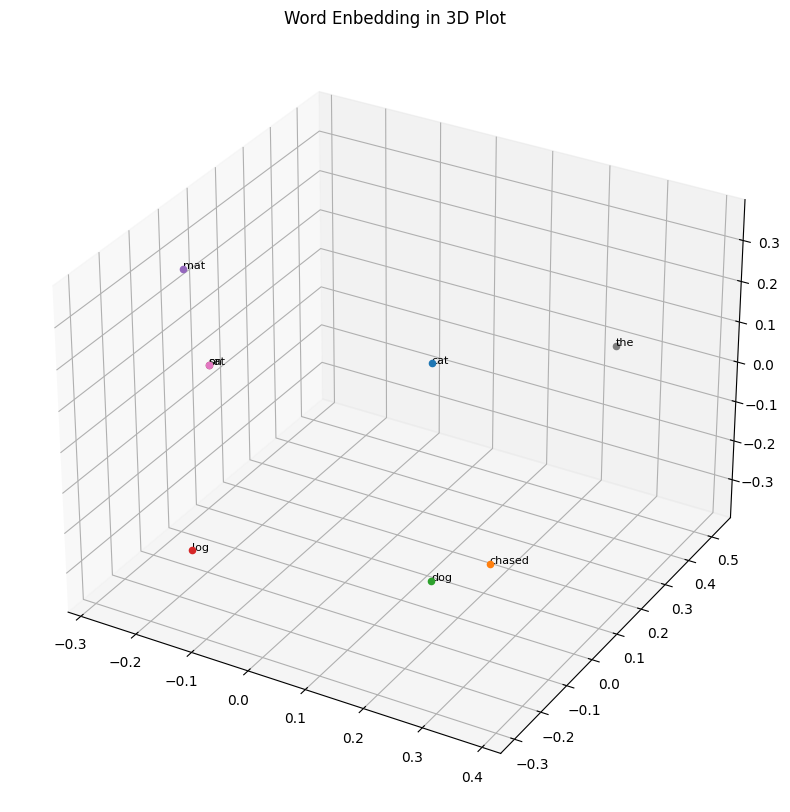

In [6]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection = '3d')

for word, Dim in Embedding.items():
    axis.scatter(Dim[0], Dim[1], Dim[2])
    axis.text(Dim[0], Dim[1], Dim[2], word, fontsize=8)
    
plt.title("Word Enbedding in 3D Plot")
plt.show()

<center><h3>Word Embedding using Word2vec</h3><center></center>

#### Cosine similarity:
$$
Cos \theta = \frac{A*B}{|A||B|}
$$

$$
A*B = \sum_{i=1}^{n} A_i . B_i  \quad |A| = \sqrt{\sum_{i=1}^{n} A_{i}^{2}} \quad |B| = \sqrt{\sum_{i=1}^{n} B_{i}^{2}}
$$


- Value range (-1 to 1)
- Cos ($\theta$) close to 1 (Similar)
- Cos ($\theta$) close to 0 (Unrelated)
- Cos ($\theta$) close to -1 (Opposite)

#### Euclidean distance:
 $$ 
   NN(q, x1) = \sqrt{(q_1 - x_i1)^2+(q_2 - x_i2)^2}
 $$
 
 - q - User query$(q)$
 - $x_i$ - $i$th Document


In [7]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')



Bag = []
for sentence in data:
    for word in word_tokenize(sentence):
        Bag.append(word)
        
list_of_words = list(map(lambda el: [el], Bag))
    
model1 = gensim.models.Word2Vec(
    list_of_words, 
    min_count = 1, 
    vector_size = 24, #Adjust based on the size of the dataset.
    window = 5 #Adjust to capture more semantic meaning.
)
try:
    print("Cosine Similarity Score (CBOW):",model1.wv.similarity('cat', 'dog'))
except(KeyError):
    print(f"Enter valid words: {Bag}")
    

model2 = gensim.models.Word2Vec(
    list_of_words,
    min_count = 1,
    vector_size = 24, #Adjust based on the size of the dataset.
    window = 5, #Adjust to capture more semantic meaning.
    sg = 1
)
try:
    print("Cosine Similarity Score (SkipGram):",model2.wv.similarity('cat', 'dog'))
except(KeyError):
    print(f"Enter valid words:{Bag}")

Cosine Similarity Score (CBOW): 0.25431046
Cosine Similarity Score (SkipGram): 0.25431046


#### If you're analyzing pairs like "king" and "queen":

- Continous Bag of Words (CBOW) might highlight semantic similarity (e.g., both being royalty).
- Skip-gram might reveal relational similarity (e.g., gender or hierarchy).

## Visual projection: 
   - https://projector.tensorflow.org